## Combined

<Figure size 960x800 with 0 Axes>

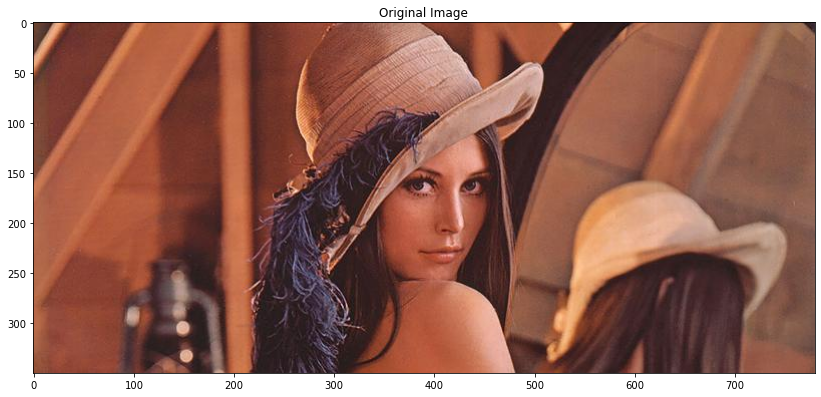

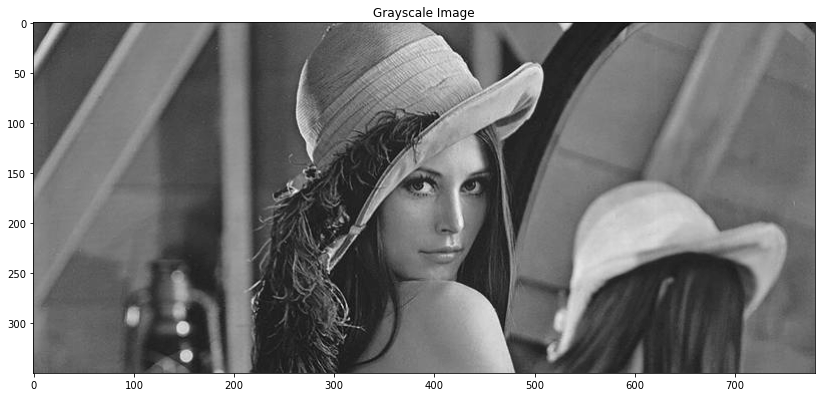

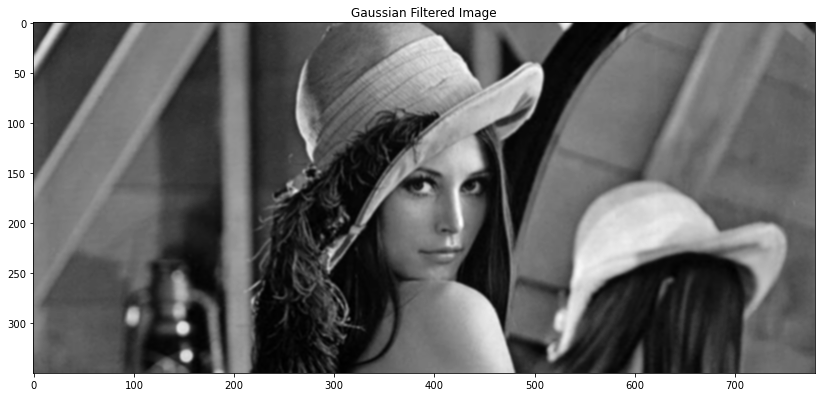

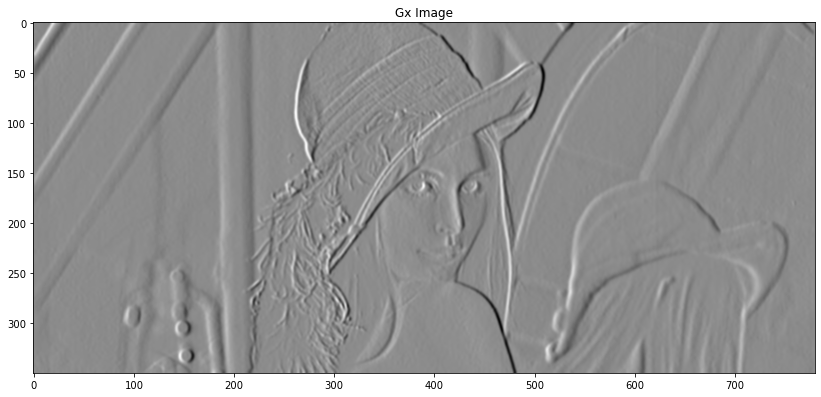

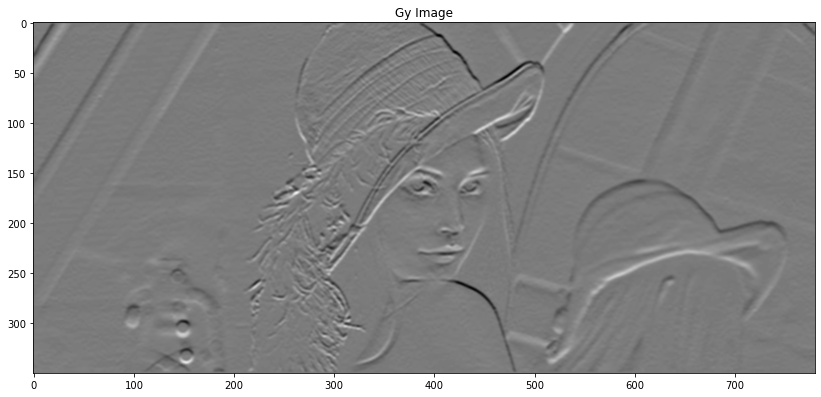

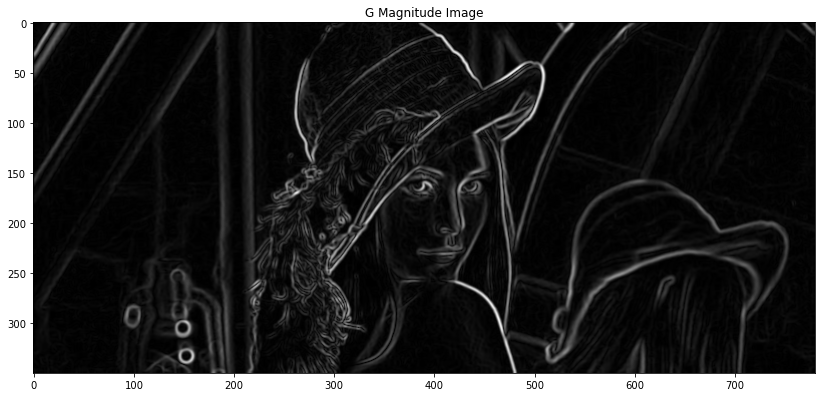

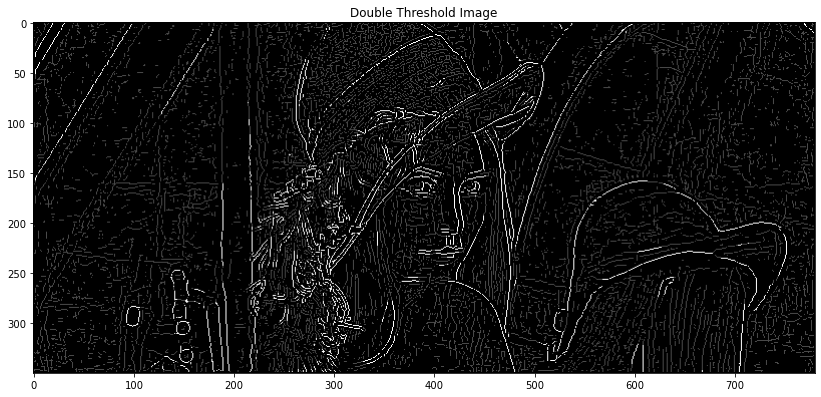

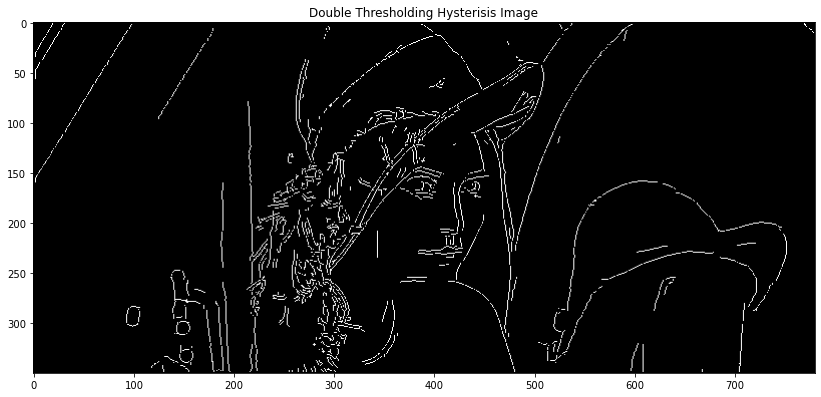

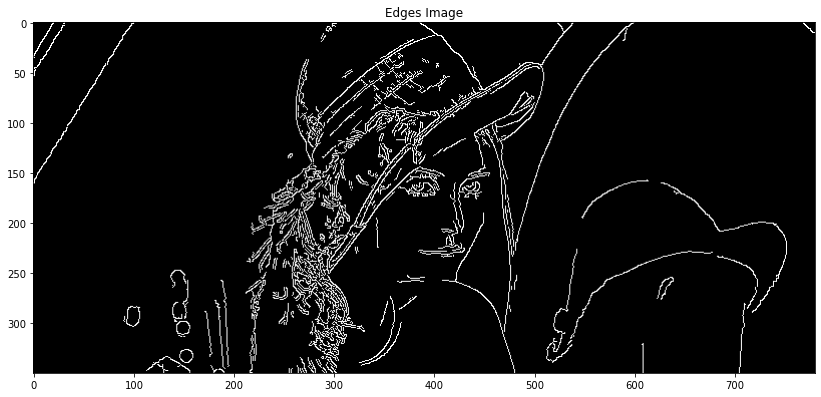

The time of execution of above program is : 9.626910209655762 seconds.


In [1]:
# %%time #check runtime

import numpy as np
import cv2 
from scipy import ndimage
from matplotlib import pyplot as plt
import warnings

import time
start = time.time()
# all the code

image_url = 'lenna.jpg'

warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

imgColor = cv2.imread(image_url)
plt.figure(figsize = (14,10))
plt.imshow(imgColor[...,::-1])
plt.title('Original Image')
plt.show()

imgGray = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)
# Normalize image
imgGray = imgGray/(np.max(imgGray)/8)
plt.figure(figsize = (14,10))
plt.imshow(imgGray, cmap = plt.get_cmap('gray'))
plt.title('Grayscale Image')
plt.show()

imgBlur= cv2.GaussianBlur(imgGray,(5,5),0)
plt.figure(figsize = (14,10))
plt.imshow(imgBlur, cmap = plt.get_cmap('gray'))
plt.title('Gaussian Filtered Image')
plt.show()

Gtx = np.array([[1,0,-1], [2,0,-2],  [1,0,-1]])
Gx = ndimage.convolve(imgBlur, Gtx)

Gty = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Gy = ndimage.convolve(imgBlur, Gty)

plt.figure(figsize = (14,10))
plt.imshow(Gx, cmap = plt.get_cmap('gray'))
plt.title('Gx Image')
plt.show()

plt.figure(figsize = (14,10))
plt.imshow(Gy, cmap = plt.get_cmap('gray'))
plt.title('Gy Image')
plt.show()

Gmag = np.hypot(Gx,Gy)
Gangle = np.degrees(np.arctan2(Gy,Gx))

plt.figure(figsize = (14,10))
plt.imshow(Gmag, cmap = plt.get_cmap('gray'))
plt.title('G Magnitude Image')
plt.show()

M, N = Gmag.shape
Gnms = np.zeros((M,N))

for i in range(1, M-1):
    for j in range(1, N-1):
        
        if((Gangle[i,j] >= 0 and Gangle[i,j] <= 45) or (Gangle[i,j] < -135 and Gangle[i,j] >= -180)):
            
            yBottom = np.array([Gmag[i,j+1], Gmag[i+1,j+1]])
            yTop = np.array([Gmag[i,j-1], Gmag[i-1,j-1]])
            x_est = np.absolute(Gy[i,j]/Gmag[i,j])
            
            if (Gmag[i,j] >= ((yBottom[1]-yBottom[0])*x_est+yBottom[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                Gnms[i,j] = Gmag[i,j]
            else:
                Gnms[i,j] = 0
                
        if((Gangle[i,j] > 45 and Gangle[i,j] <= 90) or (Gangle[i,j] < -90 and Gangle[i,j] >= -135)):
            
            yBottom = np.array([Gmag[i+1,j] ,Gmag[i+1,j+1]])
            yTop = np.array([Gmag[i-1,j] ,Gmag[i-1,j-1]])
            x_est = np.absolute(Gx[i,j]/Gmag[i,j])
            
            if (Gmag[i,j] >= ((yBottom[1]-yBottom[0])*x_est+yBottom[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                Gnms[i,j] = Gmag[i,j]
            else:
                Gnms[i,j] = 0
                
        if((Gangle[i,j] > 90 and Gangle[i,j] <= 135) or (Gangle[i,j] < -45 and Gangle[i,j] >= -90)):
            
            yBottom = np.array([Gmag[i+1,j] ,Gmag[i+1,j-1]])
            yTop = np.array([Gmag[i-1,j] ,Gmag[i-1,j+1]])
            x_est = np.absolute(Gx[i,j]/Gmag[i,j])
            
            if (Gmag[i,j] >= ((yBottom[1]-yBottom[0])*x_est+yBottom[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                Gnms[i,j] = Gmag[i,j]
            else:
                Gnms[i,j] = 0
                
        if((Gangle[i,j] > 135 and Gangle[i,j] <= 180) or (Gangle[i,j] < 0 and Gangle[i,j] >= -45)):
            
            yBottom = np.array([Gmag[i,j-1] ,Gmag[i+1,j-1]])
            yTop = np.array([Gmag[i,j+1] ,Gmag[i-1,j+1]])
            x_est = np.absolute(Gy[i,j]/Gmag[i,j])
            
            if (Gmag[i,j] >= ((yBottom[1]-yBottom[0])*x_est+yBottom[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                Gnms[i,j] = Gmag[i,j]
            else:
                Gnms[i,j] = 0


highThresholdRatio = 0.2  
lowThresholdRatio = 0.1
weak_pixel=75
strong_pixel=255

highThreshold = Gnms.max() * highThresholdRatio;
lowThreshold = highThreshold * lowThresholdRatio;

M, N = Gnms.shape
Gthres = np.zeros((M,N), dtype=np.int32)

weak = np.int32(weak_pixel)
strong = np.int32(strong_pixel)

strong_i, strong_j = np.where(Gnms >= highThreshold)
zeros_i, zeros_j = np.where(Gnms < lowThreshold)

weak_i, weak_j = np.where((Gnms <= highThreshold) & (Gnms >= lowThreshold))

Gthres[strong_i, strong_j] = strong
Gthres[weak_i, weak_j] = weak

plt.figure(figsize = (14,10))
plt.imshow(Gthres, cmap = plt.get_cmap('gray'))
plt.title('Double Threshold Image')
plt.show()


imgEdges = Gthres
M, N = Gthres.shape
weak = weak_pixel
strong = strong_pixel

for i in range(1, M-1):
    for j in range(1, N-1):
        if (imgEdges[i,j] == weak):
            try:
                if ((imgEdges[i+1, j-1] == strong) or (imgEdges[i+1, j] == strong) or (imgEdges[i+1, j+1] == strong)
                    or (imgEdges[i, j-1] == strong) or (imgEdges[i, j+1] == strong)
                    or (imgEdges[i-1, j-1] == strong) or (imgEdges[i-1, j] == strong) or (imgEdges[i-1, j+1] == strong)):
                    imgEdges[i, j] = strong
                else:
                    imgEdges[i, j] = 0
            except IndexError as e:
                pass

plt.figure(figsize = (14,10))
plt.imshow(imgEdges, cmap = plt.get_cmap('gray'))
plt.title('Double Thresholding Hysterisis Image')
plt.show

cvImgGray = cv2.imread(image_url,0)
edges = cv2.Canny(cvImgGray,100,200, True)

plt.figure(figsize = (14,10))
plt.imshow(edges, cmap = plt.get_cmap('gray'))
plt.title('Edges Image')
plt.show()

end = time.time()
print("The time of execution of above program is :", end-start, "seconds.")